## Ejercicio 1 (4 puntos)

Calcular las raíces de los polinomios dados y generar las gráficas de los
polinomos para mostrar las raíces reales encontradas.

1. Escriba una función que reciba un arreglo $c$ que contiene los 
   coeficientes del polinomio, de modo que si $c$ es un arreglo
   de longitud $n$ el valor del polinomio de grado $n-1$ en $x$
   se calcula mediante
   
$$ c[0]*x**(n-1) + c[1]*x**(n-2) + ... + c[n-2]*x + c[n-1]$$

2. Revise la documentación de la función [roots()](https://numpy.org/doc/stable/reference/generated/numpy.roots.html) de Numpy
   y úsela para obtener un arreglo con las raíces del polinomio e
   imprima las raíces encontradas.
   
3. Las raíces pueden ser complejas. Obtenga un arreglo $r$ que contenga
   sólo las raíces reales, imprimalo
   y calcule las raíz real $r_{min}$ más pequeña y 
   la raíz real $r_{max}$ más grande.
   
4. Use la función `linspace()` para generar un arreglo $x$ con 100 valores 
   que corresponden a una partición del intervalo $[r_{min}-1, r_{max}+1]$. 
   Evalúe el polinomio en los valores de $x$. 
   Puede usar la función de Numpy [polyval()](https://numpy.org/doc/stable/reference/generated/numpy.polyval.html#numpy.polyval)
   para evaluar el polinomio y generar un arreglo $y$. 
   
5. Use los arreglos $x$ y $y$ para generar la gráfica del polinomio.

6. Agregue a la gráfica los puntos que representan las raíces reales $r$.
   Para esto evalue el polinomio en $r$ para generar un arreglo $polr$ 
   con esos valores. Use los arreglos $r$ y $polr$ para graficar como
   puntos en la gráfica anterior   
   para ver que coinciden con los ceros de las gráfica.
   
7. Pruebe la función con los siguientes polinomios:

$$ f_1(x) = -4 {{x}^{3}}+33 {{x}^{2}}+97 x-840 $$

$$ f_2(x) = -2 {{x}^{4}}+15 {{x}^{3}}-36 {{x}^{2}}+135 x-162 $$   
   
### Solución:

La función que implementa los puntos del 1 al 6 es `pol_roots_plot()` y se encuentra en el módulo `lib_t2.py`. Probamos esta función con el polinomio $f_1$. En primer lugar, imprimimos las raices de $f_1$. 

In [1]:
import os
import numpy as np
from lib_t2 import *
from plotnine import *
coef_f1=[-4.0,33.0,97.0,-840.0]
roots_f1,re_roots_f1,gg_f1=poly_roots_plot(coef_f1)
print('Las raíces de f1 son: ',roots_f1)
print('Las raíces reales son: ',re_roots_f1)

Las raíces de f1 son:  [-5.    8.    5.25]
Las raíces reales son:  [-5.    8.    5.25]


La gráfica del polinomio, con dominio $[r_{\mathrm{min}}-1,r_{\mathrm{max}}+1]$ donde $r_{\mathrm{min}},r_{\mathrm{max}}$ son la mínima y máxima de las raíces reales del polinomio $f_1$, es:

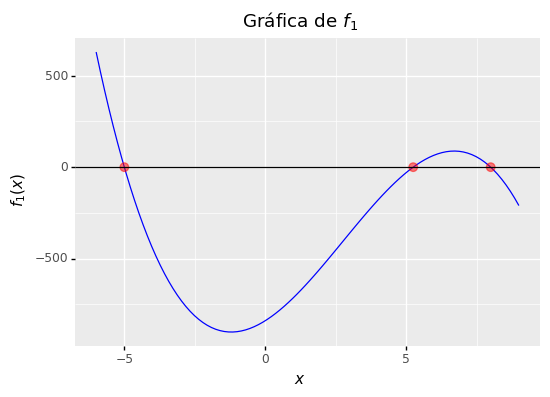

<ggplot: (8737991389296)>

In [2]:
gg_1=gg_f1+xlab(r'$x$')+ylab(r'$f_1(x)$')+ggtitle(r'Gráfica de $f_1$')+theme(figure_size=(6, 4))
gg_1

Hacemos el mismo ejercicio para el polinomio $f_2$. Primero, imprimimos las raíces y las raíces reales.

In [3]:
coef_f2=[-2.0,15.0,-36.0,135.0,-162.0]
roots_f2,re_roots_f2,gg_f2=poly_roots_plot(coef_f2)
print('Las raíces de f1 son: ',roots_f2)
print('Las raíces reales son: ',re_roots_f2)

Las raíces de f1 son:  [6.00000000e+00+0.j 8.32667268e-16+3.j 8.32667268e-16-3.j
 1.50000000e+00+0.j]
Las raíces reales son:  [6.  1.5]


/home/roberto/Documentos/DEMAT/10mo Semestre/Materias/Optimización/Tarea 2/lib_t2.py:15: ComplexWarning: Casting complex values to real discards the imaginary part


Y graficamos en el dominio $[r_{\mathrm{min}}-1,r_{\mathrm{max}}+1]$

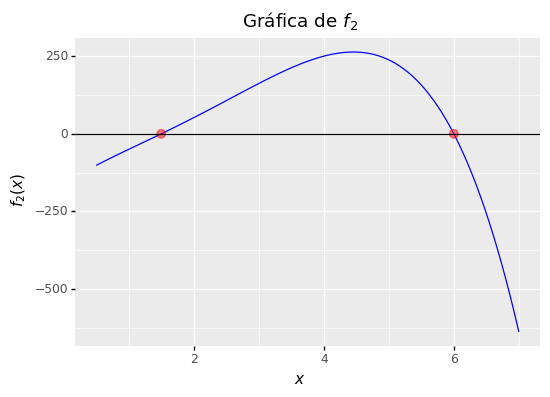

<ggplot: (8737991242084)>

In [4]:
gg_2=gg_f2+xlab(r'$x$')+ylab(r'$f_2(x)$')+ggtitle(r'Gráfica de $f_2$')+theme(figure_size=(6, 4))
gg_2

## Ejercicio 2 (6 puntos)

Programar la función que resuelve el problema de ajustar un polinomio a 
un conjunto de puntos $\{(x_0, y_0), (x_1, y_1), ..., (x_m, y_m)\}$ usando
mínimos cuadrados lineales.

Si revisan las notas del curso de métodos numéricos, se ve que para
ajustar el polinomio de grado $n$ 
$p(x) = c_n x^n + c_{n-1} x^{n-1} + ... + c_1 x + c_0$ 
mediante mínimos cuadrados, hay que plantear el problema
de minimizar la suma de diferencias elevadas al cuadrado:

$\sum_{i=0}^{m} (p(x_i) - y_i )^2$

Esto nos lleva a construir la matriz $A$ y el vector de términos independientes

$$ A = \left[\begin{array}{ccccc}
x_1^n  & x_1^{n-1} & \cdots & x_1 & 1 \\
x_2^n  & x_2^{n-1} & \cdots & x_2 & 1 \\
\vdots & \vdots    &        & \vdots  & \vdots \\
x_m^n  & x_m^{n-1} & \cdots & x_m & 1 
\end{array}\right], \qquad
b =\left( \begin{array}{c}
y_1 \\ y_2 \\ \vdots \\ y_m
\end{array}  
\right)$$


Entonces el vector  $c$  con los coeficientes del polinomio
se obtiene resolviendo el sistema de ecuaciones 

$A^{\top} A c= A^{\top} y$.


1. Programe la función que recibe como argumento un arreglo 2D que 
   contiene los puntos $\{(x_0, y_0), (x_1, y_1), ..., (x_m, y_m)\}$ y
   el grado del polinomio $n$, que construya y resuelva el sistema de ecuaciones
   para obtener el vector de coeficientes $c$ usando las funciones
   de Numpy y que devuelva
   este arreglo y el número de condición de la matriz del sistema.
   Este último dato lo puede obtener usando la función `numpy.linalg.cond()`.
2. Escriba una función que reciba como argumentos el nombre de un archivo
   que contiene los datos, el valor $n$ del grado del polinomio que 
   se quiere ajustar y un entero $r>0$.
*  La función debe leer el archivo, cargar los datos
   en una matriz y usar la función del inciso anterior para obtener el
   vector de coeficientes $c$ y el número de condición. 
   El archivo contiene una matriz con dos columnas. La primer columna tiene
   las abscisas $x_0, x_1, ..., x_{m}$ y la segunda columna tiene las
   ordenadas $y_0, y_1, ..., y_{m}$ de los puntos.
*  Obtenga el valor mínimo $x_{\min}$ y máximo  $x_{\max}$ de las abscicas $x_i$.  
*  Genere una partición $z_0, z_1, ..., z_{r-1}$ del intervalo  
   $[x_{\min}, x_{\min}]$ con $r$ puntos y 
   use la función `numpy.polyval()` para evaluar el polinomio $p(x)$
   en los puntos de la partición del intervalo.
*  Haga que la función imprima el grado $n$ del polinomio,
   los coeficientes $\mathbf{c}$ del polinomio y el número de
   condición. También haga que la función genere 
   una gráfica que muestre los puntos $\{(x_0, y_0), (x_1, y_1), ..., (x_m, y_m)\}$
   (como puntos) y los puntos $(z_i, p(z_i))$ con un trazo continuo para
   comparar los datos con la gráfica del polinomio.
3. Pruebe la función del inciso anterior usando los archivos `npy` que se encuentran
   dentro del archivo `datosTarea02.zip`.
   Para cada caso, use $r=100$ y $n=1,2,3,4,5$  y $6$ (puede poner un ciclo para
   generar los resultados de cada caso).
   
### Solución:

La función del numeral 1 que encuentra los coeficientes resolviendo el sistema $A^TAc=A^Ty$ y el número de condición de $A^TA$ es `pol_solve()` y la función del punto 2 que recibe como argumento el grado del polinomio a ajustar y el nombre del archivo para cargar los datos desde un archivo `.npy` es `pol_reg()`, ambas funciones se encuentran al igual que en el ejercicio 1 en el módulo `lib_t2.py`. A continuación ponemos el path, tomando como referencia el directorio donde se está ejecutando este notebook, de los archivos con los datos.

In [5]:
# Path de los archivos con los datos
DataEj1='/datos Tarea 2/datos1.npy'
DataEj2='/datos Tarea 2/datos2.npy'

En primer lugar, probamos estas funciones con el archivo de datos `datos1.npy`. A continuación hacemos las pruebas correspondientes con $n=1,2,3,4,5,6$ y $r=100$, en la siguiente celda se imprime el vector con los coeficientes del polinomio resultante para cada grado, en orden decreciente, es decir, del coeficiente de grado más alto hasta el término independiente, además del número de condición.

In [6]:
from matplotlib import gridspec
from plotnine import data
np.set_printoptions(precision=4)
list_plots=[]
nn=[1,2,3,4,5,6]
r=100
for n in nn:
    c,cod_num,gg=poly_reg(DataEj1,n,r)
    list_plots.append(gg)
    print(f'Los coeficientes del polinomio de grado {n} son: {c}')
    print('El número de condición de la matriz A es: %.4f'%cod_num)
    print('\n')


Los coeficientes del polinomio de grado 1 son: [-2.5592 -3.5203]
El número de condición de la matriz A es: 29.5460


Los coeficientes del polinomio de grado 2 son: [-0.4416 -0.7196  3.1585]
El número de condición de la matriz A es: 2458.7290


Los coeficientes del polinomio de grado 3 son: [-0.0611 -0.0726  0.5994 -0.3879]
El número de condición de la matriz A es: 210402.5774


Los coeficientes del polinomio de grado 4 son: [ 0.017  -0.2059 -0.4706  3.6684  1.4594]
El número de condición de la matriz A es: 15816940.8189


Los coeficientes del polinomio de grado 5 son: [ 1.2995e-03  3.0530e-03 -2.3079e-01 -4.8683e-02  3.7021e+00 -4.0155e-03]
El número de condición de la matriz A es: 1627465651.9694


Los coeficientes del polinomio de grado 6 son: [-2.4132e-04  4.5146e-03  5.4331e-03 -3.5826e-01  4.2782e-02  4.7803e+00
 -2.2272e-01]
El número de condición de la matriz A es: 132393662527.0403




Finalmente, graficamos los resultados obtenidos. En línea continua aparece la gráfica del polinomio resultante de resolver el sistema de ecuaciones.  

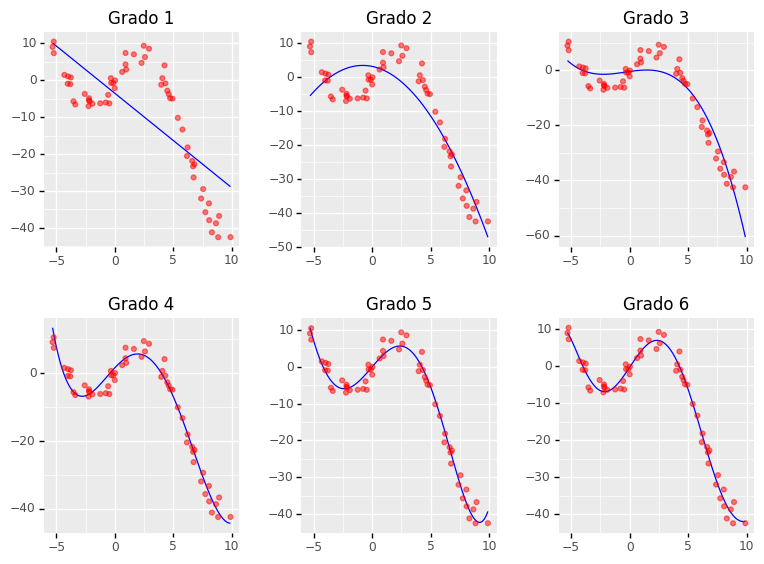

In [7]:
fig = (ggplot()+geom_blank(data=data.diamonds)+theme_void()+theme(figure_size=(8, 6))).draw()
gs = gridspec.GridSpec(2,3)
index=0
for i in range(2):
    for j in range(3):
        ax=fig.add_subplot(gs[i,j],title=f'Grado {index+1}',xmargin=20,ymargin=20)
        _=list_plots[index]._draw_using_figure(fig,[ax])
        fig.tight_layout(pad=2.0)
        index+=1

Observamos que el número de condición aumenta conforme aumenta el grado del polinomio, esto se debe a que para mayor grado este ajuste es más susceptible a la muestra que tenemos. Además, se ve que del grado 4 al 6 el ajuste es prácticamente el mismo, lo que se ve también en la magnitud de los coeficientes de orden 5 y 6, que son números pequeños. Si tuvieramos que escoger un polinomio para modelar los datos sería el de grado 4, pues es el mejor condicionado y en que se observa un buen ajuste, aunque también podrías elegir el de grado 3 ya que aunque no tiene un gran ajuste como el polinomio de grado 4 su condicionamiento es mucho mejor. 

Hacemos el mismo ejercicio para los datos en `datos2.npy`. Primero imprimimos los vectores de coeficientes resultantes que definen a los polnomios de grado $n=1,2,3,4,5,6$ con tamaño de partición $r=100$.

In [8]:
np.set_printoptions(precision=4)
list_plots=[]
nn=[1,2,3,4,5,6]
r=100
for n in nn:
    c,cod_num,gg=poly_reg(DataEj2,n,r)
    list_plots.append(gg)
    print(f'Los coeficientes del polinomio de grado {n} son: {c}')
    print('El número de condición de la matriz A es: %.4f'%cod_num)
    print('\n')

Los coeficientes del polinomio de grado 1 son: [ 0.455  21.8233]
El número de condición de la matriz A es: 57.6662


Los coeficientes del polinomio de grado 2 son: [-0.0728 -0.0499 21.9262]
El número de condición de la matriz A es: 3340.5363


Los coeficientes del polinomio de grado 3 son: [ 0.0889  0.8635  0.7332 16.6059]
El número de condición de la matriz A es: 458979.9355


Los coeficientes del polinomio de grado 4 son: [ 0.0259  0.4468  1.7319 -1.8706 11.8505]
El número de condición de la matriz A es: 57617346.0545


Los coeficientes del polinomio de grado 5 son: [-0.0184 -0.307  -1.0775  2.7639 10.8231 16.0055]
El número de condición de la matriz A es: 5519382925.3796


Los coeficientes del polinomio de grado 6 son: [-2.6826e-03 -7.6110e-02 -6.6084e-01 -1.2096e+00  6.2980e+00  1.4285e+01
  1.1681e+01]
El número de condición de la matriz A es: 537838254507.8020




Y observamos el ajuste de cada uno de estos polinomios con la muestra.

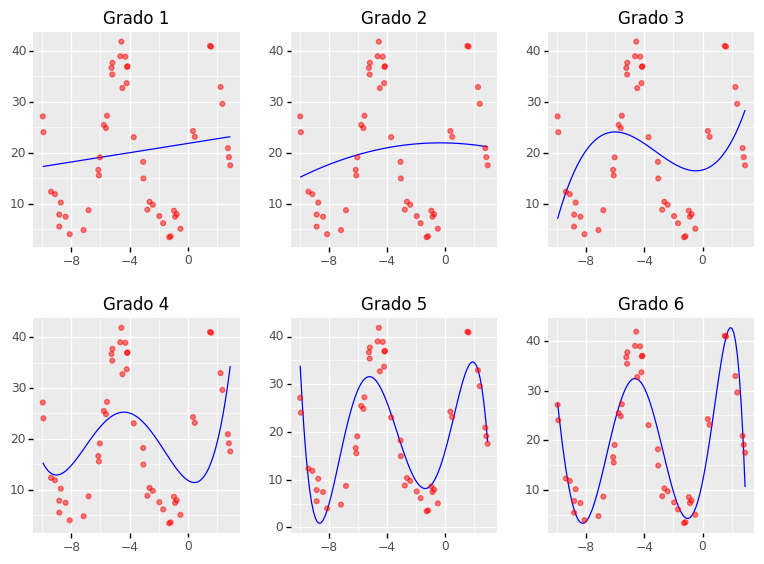

In [9]:
fig = (ggplot()+geom_blank(data=data.diamonds)+theme_void()+theme(figure_size=(8, 6))).draw()
gs = gridspec.GridSpec(2,3)
index=0
for i in range(2):
    for j in range(3):
        ax=fig.add_subplot(gs[i,j],title=f'Grado {index+1}',xmargin=20,ymargin=20)
        _=list_plots[index]._draw_using_figure(fig,[ax])
        fig.tight_layout(pad=2.0)
        index+=1

Aqui observamos un ajuste mucho más pobre incluso para los grados del 4 al 6 a diferencia de la primer base de datos, incluso el condicionamiento es peor para cada polinomio.  El que tiene mejor ajuste dado los datos es el grado $n=6$, sin embargo debido al condicionamiento tan alto podría pensar que la naturaleza de los datos no es polinomial, de hecho se observa un comportamiento periodico, por lo que podría pensarse más bien en una función seno o coseno. 